

# Project: Analyzing gun data in the United States

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



>In this report I use 2 datasets- gun data from FBI's National Instant Background Check System and census data. The FBI gun data contains information about the number of monthly background checks for permits, registered and private gun sales and rentals for all the 50 states from September 2017 till November 1998. The census data contains population estimates for 2010 and 2016 and other attributes like race, educaton level etc. With these datasets I analyzed 2 main questions: 

> 1) What is the overall trend in gun sales over the years.

> 2) What is the percapita gun sales in all 50 states in 2010 and 2016.


In [1]:
# Import statements for all of the packages used in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
#Load the FBI gun data. Its stored in an excel file
df_guncheck=pd.read_excel('gun_data.xlsx')
#df_guncheck.state.unique()


In [3]:
df_guncheck.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,0,0,0,38,12,2,0,0,0,28394
3,2017-09,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,0,0,13,23,0,0,2,1,17747
4,2017-09,California,57839,0,37165,24581,2984,0,0,0,...,0,0,0,0,0,0,0,0,0,123506


In [4]:
df_guncheck.shape

(12485, 27)

In [5]:
df_guncheck.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
df_guncheck.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [21]:
#check for null values. Null values will be dealt with in the data cleaning section
df_guncheck.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [31]:
# check for duplicates
df_guncheck.duplicated().sum()

0

The background check data appears to contains 55 unique values for state, the 50 states and 5 territories. It also contains information about background checks for permit, permit rechecks,gun rentals and returns. For our analysis of total gun sales we will use the data for hand gun, long gun and other gun sales as well as private had gun, private long gun and private other gun sales.Note that several missing values for these variables. We will fill these missing values with 0 in the data cleaning section.

In [4]:
#Load the census data
df_census=pd.read_csv('U.S. Census Data.csv')
df_census.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [36]:
df_census.tail(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_census.columns

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [5]:
df_census['Fact Note']

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  (a)
13                                                  (a)
14                                                  (a)
15                                                  (a)
16                                                  (a)
17                                              

The census data has 52 columns, 50 of which are one for each state. The column fact contains the population statistics that were collected and Fact note conatains additional information for that statistic. We are going to drop the Fact Note column and transpose the dataframe so that each state accounts for one observation of a population statistic.

In [6]:
df_census.drop('Fact Note',inplace=True,axis=1)

In [7]:
#Find the transpose of the dataframe
df_census.set_index('Fact',inplace=True)
df_census_t=df_census.transpose()
df_census_t.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,nan,Value Flags,-,D,F,FN,nan,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




### Data Cleaning

Census data: For calculating the percapita gun sales we need the population estimates for 2010 and 2016. We can drop the rest of the columns. Also note that the population estimates are stored as type str and the numbers are comma seperated. We need to convert these to floats to perform numeric operations on them.

Gun data: We only need to keep the columns pertaining to gun sales and drop the rest of the columns


In [8]:
#drop all columns except the first two columns
cols_to_drop=df_census_t.columns[2:]
df_pop=df_census_t.drop(cols_to_drop,axis=1)

In [9]:
#reset the index and save it as a new column.
df_pop_c=df_pop.reset_index(col_level=1,col_fill='state')
df_pop_c.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
0,Alabama,"4,863,300","4,780,131"
1,Alaska,"741,894","710,249"
2,Arizona,"6,931,071","6,392,301"
3,Arkansas,"2,988,248","2,916,025"
4,California,"39,250,017","37,254,522"


In [10]:
#check for missing data
df_pop_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
index                                                 50 non-null object
Population estimates, July 1, 2016,  (V2016)          50 non-null object
Population estimates base, April 1, 2010,  (V2016)    50 non-null object
dtypes: object(3)
memory usage: 1.6+ KB


In [11]:
#rename the columns and save it in a new dataframe df_pop_cleaned
df_pop_cleaned=df_pop_c.rename(columns={'index':'state','Population estimates, July 1, 2016,  (V2016)':'population_estimates_2016',
                                       'Population estimates base, April 1, 2010,  (V2016)':'population_estimates_2010'})
df_pop_cleaned.columns

Index(['state', 'population_estimates_2016', 'population_estimates_2010'], dtype='object', name='Fact')

In [12]:
#replace the ',' from the string and convert it to type float
df_pop_cleaned['population_estimates_2016'] = df_pop_cleaned['population_estimates_2016'].str.replace(',','').astype(float)
df_pop_cleaned['population_estimates_2010'] = df_pop_cleaned['population_estimates_2010'].str.replace(',','').astype(float)
df_pop_cleaned.head()

Fact,state,population_estimates_2016,population_estimates_2010
0,Alabama,4863300,4780131
1,Alaska,741894,710249
2,Arizona,6931071,6392301
3,Arkansas,2988248,2916025
4,California,39250017,37254522


In [13]:
#Cleaning the gun data
cols_to_include=['month','state','handgun','long_gun','other','private_sale_handgun','private_sale_long_gun','private_sale_other']
df_guns=df_guncheck[cols_to_include]
df_guns.head()

,month,state,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other
0,2017-09,Alabama,5734,6320,221,9,16,3
1,2017-09,Alaska,2320,2930,219,17,24,1
2,2017-09,Arizona,11063,7946,920,38,12,2
3,2017-09,Arkansas,4347,6063,165,13,23,0
4,2017-09,California,37165,24581,2984,0,0,0


In [14]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 8 columns):
month                    12485 non-null object
state                    12485 non-null object
handgun                  12465 non-null float64
long_gun                 12466 non-null float64
other                    5500 non-null float64
private_sale_handgun     2750 non-null float64
private_sale_long_gun    2750 non-null float64
private_sale_other       2750 non-null float64
dtypes: float64(6), object(2)
memory usage: 877.9+ KB


In [15]:
df_guns.fillna(0,inplace=True)
df_guns.isnull().sum()

//anaconda/lib/python3.4/site-packages/pandas/core/frame.py:2532: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


month                    0
state                    0
handgun                  0
long_gun                 0
other                    0
private_sale_handgun     0
private_sale_long_gun    0
private_sale_other       0
dtype: int64

In [16]:
#check to see if there are duplicate values
df_guns.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### analyzing the overall trend in gun sales

In [17]:
#Create a new column to store the total gun sales
df_guns['gun_totals']=df_guns.iloc[:,-6:-1].sum(axis=1)
df_guns.head()


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,month,state,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other,gun_totals
0,2017-09,Alabama,5734,6320,221,9,16,3,12300
1,2017-09,Alaska,2320,2930,219,17,24,1,5510
2,2017-09,Arizona,11063,7946,920,38,12,2,19979
3,2017-09,Arkansas,4347,6063,165,13,23,0,10611
4,2017-09,California,37165,24581,2984,0,0,0,64730


In [18]:
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 9 columns):
month                    12485 non-null object
state                    12485 non-null object
handgun                  12485 non-null float64
long_gun                 12485 non-null float64
other                    12485 non-null float64
private_sale_handgun     12485 non-null float64
private_sale_long_gun    12485 non-null float64
private_sale_other       12485 non-null float64
gun_totals               12485 non-null float64
dtypes: float64(7), object(2)
memory usage: 975.4+ KB


In [73]:
#convert the month column to a datetime object and extract the year value into a new column
df_guns['year']=pd.to_datetime(df_guns['month']).dt.year


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
df_guns['month']=pd.to_datetime(df_guns['month']).dt.month

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
df_guns.head()

,month,state,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other,gun_totals
0,9,Alabama,5734,6320,221,9,16,3,12300
1,9,Alaska,2320,2930,219,17,24,1,5510
2,9,Arizona,11063,7946,920,38,12,2,19979
3,9,Arkansas,4347,6063,165,13,23,0,10611
4,9,California,37165,24581,2984,0,0,0,64730


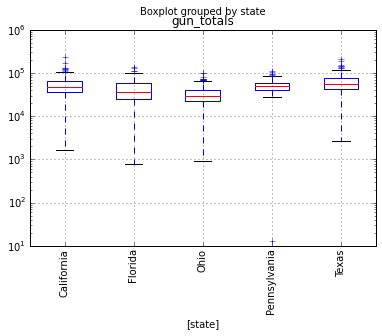

In [29]:
# Explore the variable gun_totals. Find the states that have the top 5 gun sales
df1=df_guns.groupby('state')[['long_gun']].sum().sort(columns=['long_gun'],ascending=False)[:5]
df1_new=df_guns[df_guns['state'].isin(df1.index.values.tolist())]
#include only data for which total guns is greater than  0
df1_new=df1_new[df1_new['gun_totals']>0]
df1_new.boxplot(column=['gun_totals'],by=['state'],rot=90).set_yscale('log')

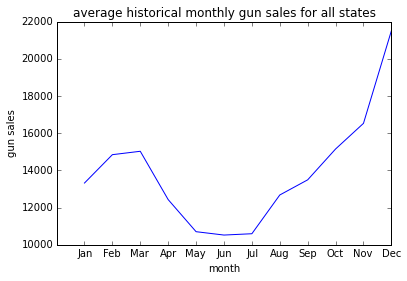

In [30]:
#In analyzing the overall gun sale trends we plot the monthly average sales
#monthly average sale is obtained by averaging the gunsales over all states and all years from 1998 to 2017 for each month
monthly_guns=df_guns.groupby('month')['gun_totals'].mean()

plt.plot(monthly_guns.index,monthly_guns.values)
xvals=monthly_guns.index
xlabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(xvals,xlabels)
plt.xlabel('month')
plt.ylabel('gun sales')
plt.title('average historical monthly gun sales for all states')

In [31]:
#group the gun data by the year and calculate the mean gun sales for every year
gun_sales_yearly=df_guns.groupby('year')['gun_totals'].mean()
gun_sales_yearly.head()

KeyError: 'year'

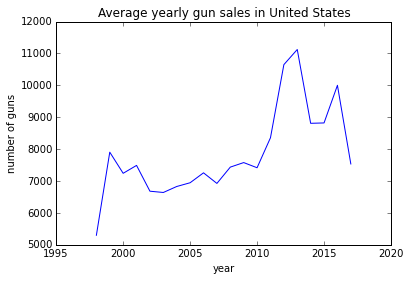

In [28]:
plt.plot(gun_sales_yearly.index,gun_sales_yearly.values)
plt.xlabel('year')
plt.ylabel('number of guns')
plt.title('Average yearly gun sales in United States')

In [107]:
#max gunsales 
gun_sales_yearly.idxmax()

2016

In [108]:
#min gun sales
gun_sales_yearly.idxmin()

1998

### What is the percapita gun sales in each state in 2010 and 2016

In [76]:
# looking at the population data again
df_pop_cleaned.head()


Fact,state,population_estimates_2016,population_estimates_2010
0,Alabama,4863300,4780131
1,Alaska,741894,710249
2,Arizona,6931071,6392301
3,Arkansas,2988248,2916025
4,California,39250017,37254522


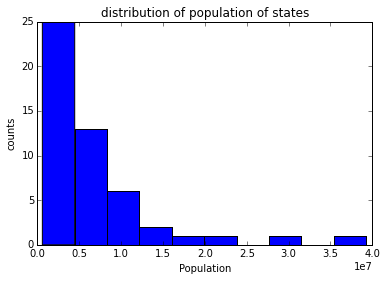

In [81]:
# We explore the distribution of population using a histogram. The state with the highest population 
# in the histogram is California.
plt.hist(df_pop_cleaned['population_estimates_2016'])
plt.xlabel('Population')
plt.ylabel('counts')
plt.title('distribution of population of states')

In [96]:
#First we select the gun sales for the month of July 2016 (to match the census data)
guns_2016=df_guns[df_guns['month']=='2016-07']
guns_2016=guns_2016.rename(columns={'gun_totals':'gun_totals_2016'})
guns_2016.head()

,month,state,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other,gun_totals_2016,year
770,2016-07,Alabama,10132,7392,538,9,5,0,18076,2016
771,2016-07,Alaska,2898,2816,239,7,17,0,5977,2016
772,2016-07,Arizona,13693,8643,1283,13,9,0,23641,2016
773,2016-07,Arkansas,6323,5053,325,7,5,1,11713,2016
774,2016-07,California,46361,47594,17297,0,0,0,111252,2016


In [97]:
#select the gun sales for the month of April 2010
guns_2010=df_guns[df_guns['month']=='2010-04']
guns_2010=guns_2010.rename(columns={'gun_totals':'gun_totals_2010'})
guns_2010.head()

,month,state,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other,gun_totals_2010,year
4895,2010-04,Alabama,8727,8095,131,NaN,NaN,NaN,16953,2010
4896,2010-04,Alaska,2650,3136,64,NaN,NaN,NaN,5850,2010
4897,2010-04,Arizona,7787,5097,198,NaN,NaN,NaN,13082,2010
4898,2010-04,Arkansas,3865,3833,45,NaN,NaN,NaN,7743,2010
4899,2010-04,California,26170,27650,0,NaN,NaN,NaN,53820,2010


In [98]:
# drop all the extra columns
cols_to_include_2016=['month','state','gun_totals_2016','year']
cols_to_include_2010=['month','state','gun_totals_2010','year']
df_guns_2010=guns_2010[cols_to_include_2010]
df_guns_2016=guns_2016[cols_to_include_2016]

In [99]:
#merge the two gundatas into a single dataframe
df_guns_merged=df_guns_2010.merge(df_guns_2016,how='left',on='state')
df_guns_merged.head()

,month_x,state,gun_totals_2010,year_x,month_y,gun_totals_2016,year_y
0,2010-04,Alabama,16953,2010,2016-07,18076,2016
1,2010-04,Alaska,5850,2010,2016-07,5977,2016
2,2010-04,Arizona,13082,2010,2016-07,23641,2016
3,2010-04,Arkansas,7743,2010,2016-07,11713,2016
4,2010-04,California,53820,2010,2016-07,111252,2016


In [100]:
#merge the gun data with the census data
df_merged=df_pop_cleaned.merge(df_guns_merged,how='left',on='state')


In [101]:
df_merged.head()

Fact,state,population_estimates_2016,population_estimates_2010,month_x,gun_totals_2010,year_x,month_y,gun_totals_2016,year_y
0,Alabama,4863300,4780131,2010-04,16953,2010,2016-07,18076,2016
1,Alaska,741894,710249,2010-04,5850,2010,2016-07,5977,2016
2,Arizona,6931071,6392301,2010-04,13082,2010,2016-07,23641,2016
3,Arkansas,2988248,2916025,2010-04,7743,2010,2016-07,11713,2016
4,California,39250017,37254522,2010-04,53820,2010,2016-07,111252,2016


In [102]:
cols_to_keep=['state','population_estimates_2016','population_estimates_2010','gun_totals_2016','gun_totals_2010']
df_merged=df_merged[cols_to_keep]
df_merged.head()

Fact,state,population_estimates_2016,population_estimates_2010,gun_totals_2016,gun_totals_2010
0,Alabama,4863300,4780131,18076,16953
1,Alaska,741894,710249,5977,5850
2,Arizona,6931071,6392301,23641,13082
3,Arkansas,2988248,2916025,11713,7743
4,California,39250017,37254522,111252,53820


In [103]:
#calculate gun totals per capita
df_merged['gun_2016_per_100thousand']=df_merged['gun_totals_2016']/df_merged['population_estimates_2016']*100000
df_merged['gun_2010_per_100thousand']=df_merged['gun_totals_2010']/df_merged['population_estimates_2010']*100000
df_merged.head()

Fact,state,population_estimates_2016,population_estimates_2010,gun_totals_2016,gun_totals_2010,gun_2016_per_100thousand,gun_2010_per_100thousand
0,Alabama,4863300,4780131,18076,16953,371.681780,354.655552
1,Alaska,741894,710249,5977,5850,805.640698,823.654803
2,Arizona,6931071,6392301,23641,13082,341.087258,204.652440
3,Arkansas,2988248,2916025,11713,7743,391.968806,265.532703
4,California,39250017,37254522,111252,53820,283.444463,144.465684


In [104]:
# sort the data by the highest gun sales in 2016
df_merged_sorted=df_merged.sort(['gun_2016_per_100thousand'])
df_merged_sorted.head()

Fact,state,population_estimates_2016,population_estimates_2010,gun_totals_2016,gun_totals_2010,gun_2016_per_100thousand,gun_2010_per_100thousand
10,Hawaii,1428557,1360301,0,0,0.000000,0.000000
14,Iowa,3134693,3046869,2444,2492,77.966168,81.788879
26,Nebraska,1907116,1826334,1651,1729,86.570508,94.670526
29,New Jersey,8944469,8791953,10074,4142,112.628262,47.111262
31,New York,19745289,19378110,25518,17137,129.235890,88.434837


In [119]:
xlabels=df_merged_sorted.state.values
xlabels

array(['Hawaii', 'Iowa', 'Nebraska', 'New Jersey', 'New York',
       'North Carolina', 'Maryland', 'Massachusetts', 'Michigan',
       'Rhode Island', 'Utah', 'Georgia', 'Illinois', 'California',
       'Nevada', 'Texas', 'South Carolina', 'Arizona', 'Minnesota',
       'Kentucky', 'Alabama', 'Delaware', 'Arkansas', 'Kansas', 'Ohio',
       'Wisconsin', 'Washington', 'Vermont', 'Connecticut', 'Florida',
       'Idaho', 'Pennsylvania', 'New Mexico', 'Indiana', 'Maine',
       'Virginia', 'North Dakota', 'Oklahoma', 'Mississippi', 'Missouri',
       'Wyoming', 'Oregon', 'Tennessee', 'Colorado', 'West Virginia',
       'South Dakota', 'Montana', 'New Hampshire', 'Louisiana', 'Alaska'], dtype=object)

In [112]:
df_merged_sorted.tail()

Fact,state,population_estimates_2016,population_estimates_2010,gun_totals_2016,gun_totals_2010,gun_2016_per_100thousand,gun_2010_per_100thousand
40,South Dakota,865454,814195,5777,4200,667.510925,515.846941
25,Montana,1042520,989414,6998,6061,671.258105,612.584823
28,New Hampshire,1334795,1316461,9105,5001,682.127218,379.882123
17,Louisiana,4681666,4533479,35351,11469,755.094447,252.984518
1,Alaska,741894,710249,5977,5850,805.640698,823.654803


[   0.           77.96616766   86.57050751  112.62826223  129.23589014
  144.72560184  159.41302234  189.71549136  200.59828974  208.0600061
  228.9250486   238.40073262  260.14059716  283.44446322  290.06230489
  319.08369199  333.91660228  341.08725765  360.07559486  368.15631554
  371.68177986  381.8016627   391.9688058   395.11035883  411.71400299
  413.89874692  414.59934138  418.3517613   436.04667419  438.84665953
  440.90212341  458.80756029  472.36564849  502.49862318  504.70191419
  504.83796111  515.99573588  554.06300552  568.60347854  592.94272116
  601.19453255  605.6238419   637.38931687  639.75655824  648.73502405
  667.5109249   671.25810536  682.12721804  755.09444715  805.640698  ]


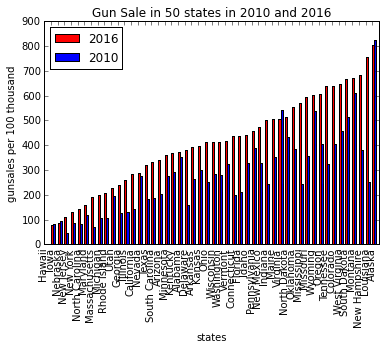

In [121]:
xvals=np.arange(50)
print(df_merged_sorted['gun_2016_per_100thousand'].values)
bars_2016=plt.bar(xvals,height=df_merged_sorted['gun_2016_per_100thousand'].values,width=0.3,color='r',label='2016');
bars_2010=plt.bar(xvals+0.3,height=df_merged_sorted['gun_2010_per_100thousand'].values,width=0.3,color='b',label='2010')
plt.xticks(xvals,xlabels,rotation=90)
plt.ylabel('gunsales per 100 thousand')
plt.xlabel('states')
plt.legend(loc='best')
plt.title('Gun Sale in 50 states in 2010 and 2016')

<a id='conclusions'></a>
## Conclusions



Obervation 1:
a) referring to the figure of the avergae yearly gun sales, the highest avergae gun sales were in the year 2016 and the lowest in the year 1998. 

b) referring to the monthly average sales there seems to be a monthly uptick in gun sales in the month of December

Observation 2: referring to the plot of gun sales in 50 states we see Alaska has the higest gunsale of 826 guns per 100,000 people in 2016. Of the 50 states Iowa has the lowest per capita gun sales of 78 per 100,000 people in 2016.

Limitations: 
Firstly we are using the FBI background check data as a proxy for gun sales. We are making an assumption that if a background check is performed we will interpret it as a sale. However this is not true in real life. Folks might decide not to buy the gun after the check in performed. Hence all the conclusions we have drawn about the gun sales is reliant on making this assumption of a one to one correspondence between background check and gun sales
Secondly many states donot have a requirement to perform a background check for private sales. Hence our analysis might miss those situations where gunsales where performed but no background check is requires.